# EX2-1 선형회귀 당뇨병 수치를 맞춰보자

# 1. 데이터 가져오고 저장하기

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [21]:
from sklearn.datasets import load_diabetes   # 싸이킷 런에서 데이터프레임을 불러온다
dia = load_diabetes()                        # 불러온 데이터에 변수를 지정해준다


In [22]:
print(dia.keys())        # 데이터 안의 변수 확인

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [23]:
print(dia.data.shape)    # 문제개수 확인
print(dia.data_filename) 
print(dia.data)         # 문제가 문자열이 아니라 더미파일 쓸필요없음

(442, 10)
diabetes_data.csv.gz
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [24]:
print(dia.target.shape)    # 답지 개수 확인
print(dia.target_filename)
print(dia.target)          

(442,)
diabetes_target.csv.gz
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 1

In [25]:
df = pd.DataFrame(dia.data, columns=dia.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


(2) 모델에 입력할 데이터 x를 준비하기 df_X에 있는 값들을 numpy array로 변환해서 저장

(3) 모델이 예측할 데이터 y를 준비하기 df_y에 있는 값들은 numpy array로 변환해서 저장하세요


In [26]:
X_data = dia.data           # 데이터 베이스의 데이터를 넘파이로 변환해서 저장한다
Y_data = dia.target         # 데이터 베이스의 타켓을 넘파이로 변환해서 저장한다

(4) train데이터와 test데이터로 분리하기 x와 y의 데이터를 각각 train 데이터와 test데이터로 분리

In [27]:
X_train, X_test,y_train, y_test = train_test_split(X_data,Y_data,test_size=0.2, random_state=7 ) 
X_train.shape, y_train.shape # 잘 나눠졌는지 확인한다


((353, 10), (353,))

(5) 모델 준비하기 입력 데이터 개수에 맞는 가중치 w, b를 준비 모델 함수를 구현

In [28]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()          
# W, b 초기값을 랜덤으로 준다
# 피쳐가 10개기 때문에 10개 만들어준다
print(W)
print(b)

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# 모델 준비 (1차 함수)

[0.74253938 0.92746084 0.43437176 0.40137439 0.85298451 0.72074652
 0.67505838 0.76972578 0.40140502 0.94232968]
0.021273583906780358


(6) 손실함수 loss정하기 손실함수를 MSE함수로 정의하세요

In [29]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
# MSE함수로 오차를 구한다
def loss(X, W, b, y):
  predictions = model(X, W, b)
  L = MSE(predictions, y)
  return L

# 모델을 통한 예측값과 정답과의 오차를 mse를 통해 로스값을 구한뒤 출력한다

W를 어디로 옮길지 모르기 때문에 기울기를 구해야 한다

(7) 기울기를 구하는 gradient함수 구현하기 기울기를 계산하는 gradient함수를 구현해 주세요

In [30]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
# 

In [31]:
dW, db = gradient(X_train, W, b, y_train)
print("dW:", dW)
print("db:", db)

dW: [ -50.17625873  -12.19057486 -154.88630336 -116.05063707  -58.58188914
  -53.11808606  115.80818078 -125.85708409 -153.22371357 -101.50255502]
db: -308.15508267722873


(8) 하이퍼 파라미터인 학습률 설정하기 학습률, learning rate를 설정해 주세요 만약 학습이 잘 되지 않는다면 learning rate 값을 여러가지로 설정하며 실험해 보세요

In [32]:
LEARNING_RATE = 0.3
# 학습률 설정
# 학습율을 올릴수록 로스값이 낮아졌지만 2850을 기점으로 더이상 좋아지지 않고 무한대를 넘어간다

하이퍼 파라미터는 사람이 직접 정하고 수정해야한다

(9)모델 학습하기 정의된 손실함수와 기울기 함수로 모델을 학습해주세요 loss값이 충분히 떨어질때까지 학습을 진행해 주세요 입력하는 데이터인 x에 들어가는 특성 컬럼들을 몇개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요

In [33]:
losses = []
# 로스함수 빈 리스트 생성
for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:  
        print('Iteration %d : Loss %0.4f' % (i, L))
    
  # 총 1000번 learning rate 단위로 이동하면서 로스함수를 통해 w, b를 수정 해준다
  # 로스함수10번 수정할때마다 출력

Iteration 10 : Loss 3411.4259
Iteration 20 : Loss 3081.0952
Iteration 30 : Loss 2963.5442
Iteration 40 : Loss 2916.7170
Iteration 50 : Loss 2897.0766
Iteration 60 : Loss 2888.3984
Iteration 70 : Loss 2884.3271
Iteration 80 : Loss 2882.2703
Iteration 90 : Loss 2881.1296
Iteration 100 : Loss 2880.4220
Iteration 110 : Loss 2879.9277
Iteration 120 : Loss 2879.5424
Iteration 130 : Loss 2879.2155
Iteration 140 : Loss 2878.9210
Iteration 150 : Loss 2878.6456
Iteration 160 : Loss 2878.3820
Iteration 170 : Loss 2878.1264
Iteration 180 : Loss 2877.8765
Iteration 190 : Loss 2877.6309
Iteration 200 : Loss 2877.3890
Iteration 210 : Loss 2877.1503
Iteration 220 : Loss 2876.9144
Iteration 230 : Loss 2876.6811
Iteration 240 : Loss 2876.4504
Iteration 250 : Loss 2876.2221
Iteration 260 : Loss 2875.9962
Iteration 270 : Loss 2875.7725
Iteration 280 : Loss 2875.5510
Iteration 290 : Loss 2875.3317
Iteration 300 : Loss 2875.1144
Iteration 310 : Loss 2874.8993
Iteration 320 : Loss 2874.6862
Iteration 330 : L

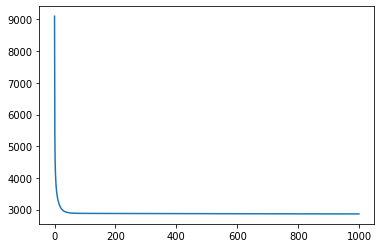

In [34]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

# 오차가 빠르게 줄어들고 2500대에서 수렴함을 확인 할 수있다

In [35]:
W, b

# 최종 결정된 W, b값

(array([ -57.50928145, -256.15731568,  547.68086648,  339.22463578,
        -346.25466832,  111.49430666, -114.31747192,  123.630454  ,
         601.82706847,   73.83381673]), 153.9849252101338)

(10) test데이터에 대한 성능 확인하기 test 데이터에 대한 성능을 확인해 주세요

In [36]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

# 2944에서 더이상 낮아지지 않는다

2944.504488353272

(11) 정답 데이터와 예측한 데이터 시각화하기 x축에는 X데이터의 첫 번째 칼럼을 y축에는 정답인 target데이터를 넣어서 모델이 예측한 데이터를 시각화 해주세요

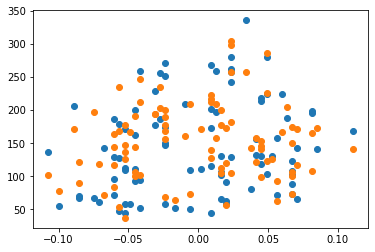

In [37]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 정답데이터와 예측데이터가 크게 다르지 않게 분산되어 있는 모습을 확인 할 수있다

----------------------------------------------------------------------------------------------

# 프로젝트2: 날씨 좋은 월요일 오후 세시, 자전거 타는 사람은 몇명?

In [38]:
from sklearn.datasets import load_diabetes
import pandas as pd

train = pd.read_csv('/content/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 1. 데이터 가져오기

In [39]:
import numpy as np
import pandas as pd 

data_path = 'content/bike-sharing-demand/'

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')   
 

In [40]:
train.shape, test.shape  

# 문제 트레인셋과 테스트셋의 문제 개수확인 및 각각의 데이터 확인

((10886, 12), (6493, 9))

In [41]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [42]:
test.head() 
# train에 비해 3개의 컬럼이 부족하다

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## 2. datetime컬럼을 datetime자료형으로 변환하고 연,월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

In [43]:
train['datetime']
# 칼럼을 변환하기 전에 데이터 확인

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [44]:
train['datetime'] = pd.to_datetime(train['datetime'])

# object타입을 datetime으로 변환

In [45]:
print(train['datetime'])
# type이 바뀐것을 확인할 수 있다

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]


In [46]:
print(train['datetime'].dt.year)
# year칼럼만 생성할 수 있는걸 확인한다

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime, Length: 10886, dtype: int64


In [47]:
train['year'] = train['datetime'].dt.year 
train['month'] = train['datetime'].dt.month 
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour 
train['minute'] = train['datetime'].dt.minute 
train['second'] = train['datetime'].dt.second 

# 년,월,일,시,분,초 칼럼을 각각 생성한다

In [48]:
train.head()

# 칼럼이 추가된것을 확인 할 수있다

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## 3. 데이터 개수 시각화 하기

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

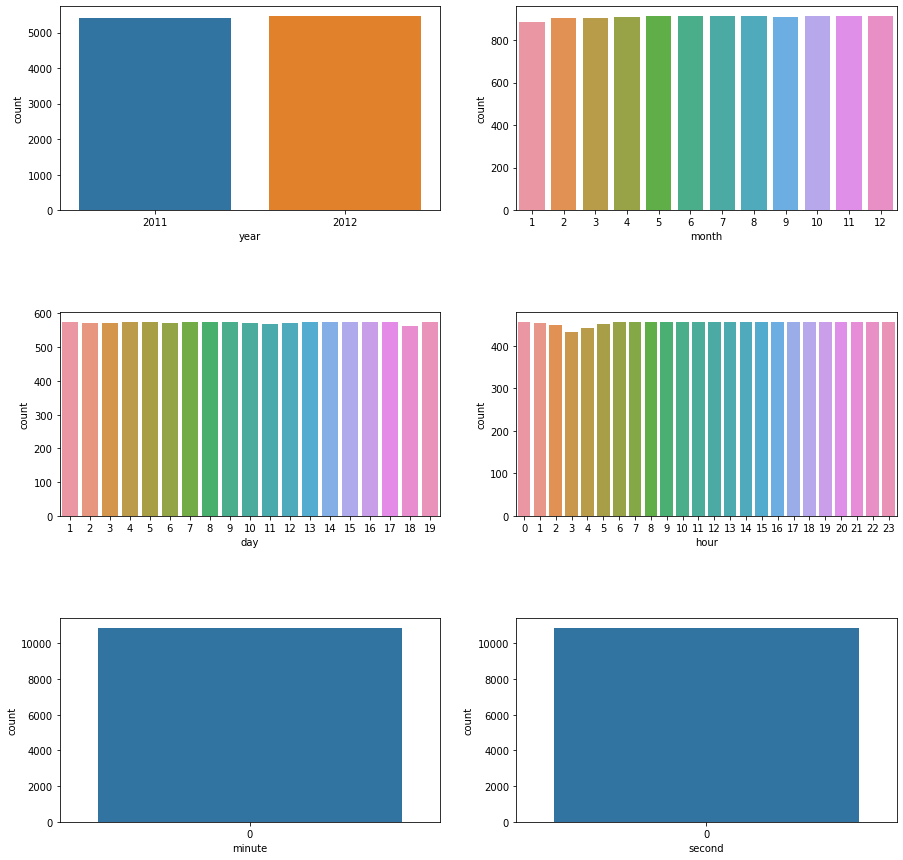

In [49]:
import matplotlib.pyplot as plt  
import seaborn as sns  


fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.countplot('year', data=train,  ax=axes[0,0])
sns.countplot('month', data=train,  ax=axes[0,1])
sns.countplot('day', data=train,  ax=axes[1,0])
sns.countplot('hour', data=train,  ax=axes[1,1])
sns.countplot('minute', data=train,  ax=axes[2,0])
sns.countplot('second', data=train,  ax=axes[2,1])
#plt.subplots_adjust(left=0.125,bottom=0.1, right=0.9, top=0.9, wspace=0.2,hspace=0.35)

#plt.show()
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

# countplot을 이용해 시각화를 해 보았는데 아무래도 데이터의 개수 자체를 보여주는것이라 
# count에 대해 봐야하는 우리의 목적과 맞지 않는것 같다

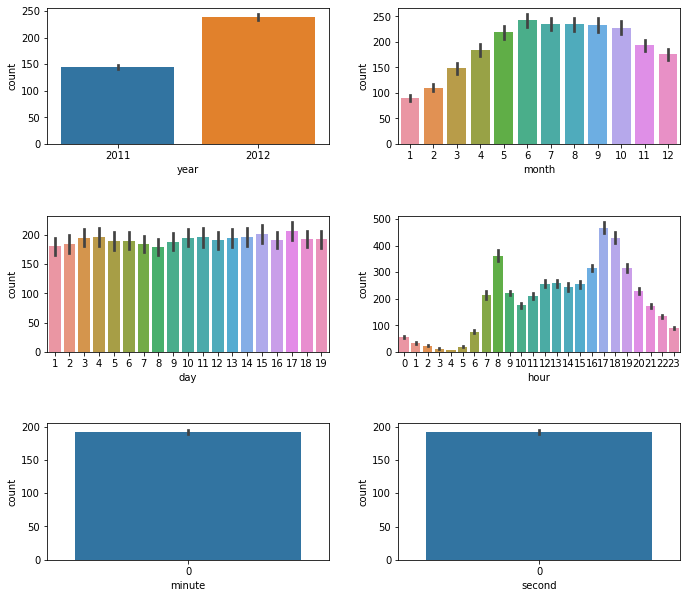

In [50]:
figure, axes = plt.subplots(nrows = 3, ncols = 2)
plt.tight_layout()
figure.set_size_inches(10,9)

sns.barplot(x='year', y='count', data=train, ax=axes[0,0])
sns.barplot(x='month', y='count', data=train, ax= axes[0,1])
sns.barplot(x='day', y='count', data=train, ax=axes[1,0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1,1])
sns.barplot(x='minute',y='count',data=train, ax=axes[2,0])
sns.barplot(x='second', y='count', data=train, ax=axes[2,1])

# y축도 지정해 줄수 있는 barplot으로 확인 해 보겠다
# month와 hour에서 뚜렷한 insight를 찾을 수 있다

## 4. X, y 컬럼 선택 및 train/test 데이터 분리

In [51]:
from sklearn.model_selection import train_test_split

train = train[[	'season',	'holiday',	'workingday',	'weather',	'temp',	'atemp',	'humidity',	'windspeed',	'casual',	'registered',	'count',	'year',	'month',	'day',	'hour',	'minute',	'second']]

# 새로운 트레인셋을 만든다

In [52]:
X = train[['season',	'holiday',	'workingday',	'weather',	'temp',	'atemp',	'humidity',	'windspeed','month','hour']].values
y=train['count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 기존의 훈련데이터를 훈련용 테스트용으로 쪼갠다

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# 잘 쪼개진걸 확인할 수 있다

(8708, 10) (8708,)
(2178, 10) (2178,)


In [53]:
## 5. LinearRegression 모델 학습

In [54]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## 6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [55]:
model.fit(X_train, y_train)
# 모델에 훈련용 데이터와 라벨을 통해 학습을 시킨다
predictions = model.predict(X_test)
# 학습시킨 모델에 테스트용 문제를 넣은 후 예측값을 predictions에 넣는다
predictions



array([293.76286852,   7.11354747, 239.69517747, ..., 271.69335949,
        -6.37796452, 203.8627153 ])

In [56]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse
# 손실함수를 통해 loss값을 확인한다

21660.42472402031

In [57]:
rmse = mse**0.5
rmse

# 문제에서 rmse를 사용하라 했으니 root를 취해 rmse를 만들어준다

147.17481008657802

## 7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

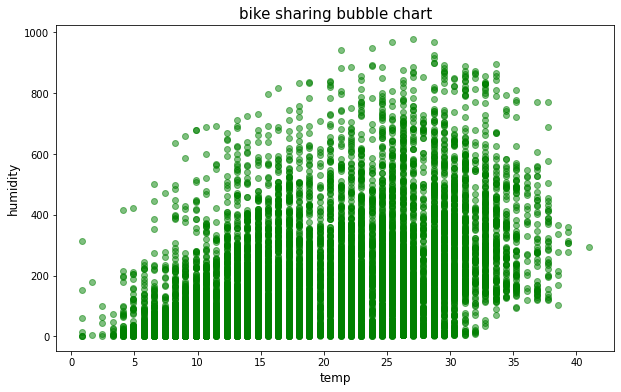

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(train['temp'], # x축
            train['count'], # y축
            c = 'green', # 색깔(고정)
            alpha = 0.5) # 투명도

plt.xlabel('temp', size = 12)
plt.ylabel('humidity', size = 12)
plt.title('bike sharing bubble chart', size = 15)
plt.show()

# temp와 count를 이용해 시각화 하였다
# 15~35도 사이에서 가장 많이 대여한것을 확인 할 수 있다

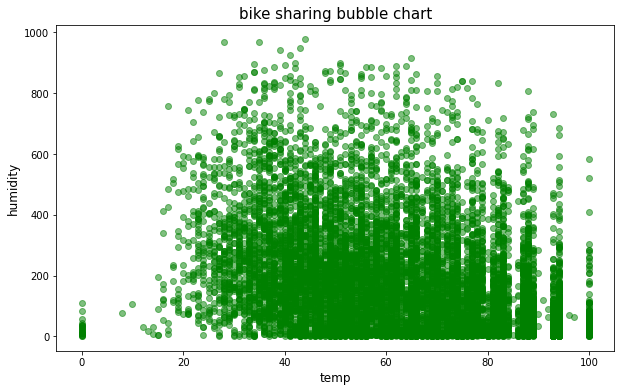

In [59]:
plt.figure(figsize=(10,6))

plt.scatter(train['humidity'], # x축
            train['count'], # y축
            c = 'green', # 색깔(고정)
            alpha = 0.5) # 투명도

plt.xlabel('temp', size = 12)
plt.ylabel('humidity', size = 12)
plt.title('bike sharing bubble chart', size = 15)
plt.show()

# 습도에 따른 대여량을 확인 할 수있다
# 습도가 0~20 사이을 제외한 나머지에선 대체로 높은 대여량을 보여준다

## 8. 결론 및 회고

학습을 시키기 위한 모델함수를 만들고 그 모델함수에 손실함수라는 지표를 토대로 W, B를 수정하는 방법을 배웠다. 갑자기 많은 함수들이 나와서 머리가 뒤죽박죽 어지러웠고 정리하는데 시간이 좀 걸렸다. 아직 학습모델들에 대한건 정확히 이해를 못한것 같아서 주말에 정리를 해야할 필요성을 느꼈다. 
익스 2-2는 거의 감을 잡지 못해 명찬님이 붙어서 많은 도움을 줬다. 약간 모르는 부분들은 다행히 캐글과 데이터셋이 같아서 창현님의 자세한 설명으로 이해는 한것같다. 스스로 해낸것없이 남들의 도움만 받는것 같아서 미안하다...
나도 빨리 성장해서 정보를 교환하고 누군가에게 도움을 줄만큼 성장했으면 좋겠다.